In [2]:
import pandas as pd
import seaborn as sns
import sklearn
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import pickle
from sklearn.metrics import (mean_squared_error, mean_absolute_error,r2_score)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('data/fuel-consumption.xlsx',na_values='?')
df.head()

,car name,cylinders,displacement,horsepower,weight,model year,kml
0,Hyundai Stargazer,4,1497,113.4,1191.0,22,12.04
1,Toyota Avanza Veloz 1.3 MT,4,1329,95.0,1045.0,22,14.60
2,mitsubishi Xpander,4,1499,104.0,1780.0,20,11.80
3,toyoya raize 1.0L Turbo,3,998,97.0,1255.0,21,11.50
4,toyota gr yaris,3,1618,257.0,1280.0,20,10.00


In [4]:
df.dropna(inplace=True)

In [5]:
df['car name'].unique()

array(['Hyundai Stargazer', 'Toyota Avanza Veloz 1.3 MT',
       'mitsubishi Xpander', 'toyoya raize 1.0L Turbo', 'toyota gr yaris',
       'Hyundai Santa Fe CRDi', 'Tiggo 7 Pro', 'Wuling Almaz RS',
       'honda civic rs', 'all new suzuki ertiga',
       'nissan serena c26 facelift', 'honda hrv type SE', 'Hyundai Creta',
       'toyota avanza', 'lexus rx200t', 'suzuki xl7 alpha AT',
       'honda br-v', 'nissan grand livina l11 2014', 'agya mt',
       'daihatsu xenia li 1.0', 'all new pajero sport dakar 2017',
       'toyota kijang kapsul lgx 1.8l EFI', ' ISUZU MU-X 2019',
       'toyota innova reborn 2.4 V', 'DFSK Glory i-Auto',
       'Daihatsu Sigra 1.2', 'Datsun GO AT', 'Datsun GO Cross',
       'Honda Accord Turbo', 'KIA Picanto', 'Mitsubishi Eclipse Cross',
       'Suzuki Swift', 'All new Toyota Fortuner ', 'Toyota C-HR',
       'toyota corona mark ii', 'ford f250', 'maxda glc deluxe',
       'dodge colt hatchback custom', 'amc spirit dl',
       'mercedes benz 300d', 'cadillac

In [6]:
df.drop(['car name'],axis=1,inplace=True)

In [7]:
x = df.drop('kml',axis=1)
Y = df['kml']
x_train,x_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.2,random_state=101)

In [8]:
sc=StandardScaler()
x_train_std=sc.fit_transform(x_train)
x_test_std=sc.transform(x_test)

In [20]:
pickle.dump(sc, open(r'scaler.pkl', 'wb'))

In [12]:
model = Sequential()

model.add(Dense(units = 64,activation='relu',input_shape=[len(x_train.keys())]))
model.add(Dense(units = 64,activation='relu'))
model.add(Dense(units = 64,activation='relu'))
model.add(Dense(units = 64,activation='relu'))
model.add(Dense(units=1))

model.compile(loss='mean_squared_error',
                optimizer='Adam',
                metrics=['mean_absolute_error', 'mean_squared_error'])

In [13]:
model_history=model.fit(x_train_std, Y_train, batch_size = 100,epochs = 1000)

Epoch 1/1000
2/2 [==============================] - 1s 2ms/step - loss: 179.9553 - mean_absolute_error: 13.1395 - mean_squared_error: 179.9553
Epoch 2/1000
2/2 [==============================] - 0s 3ms/step - loss: 177.2395 - mean_absolute_error: 13.0311 - mean_squared_error: 177.2395
Epoch 3/1000
2/2 [==============================] - 0s 8ms/step - loss: 174.6086 - mean_absolute_error: 12.9268 - mean_squared_error: 174.6086
Epoch 4/1000
2/2 [==============================] - 0s 4ms/step - loss: 171.8888 - mean_absolute_error: 12.8148 - mean_squared_error: 171.8888
Epoch 5/1000
2/2 [==============================] - 0s 5ms/step - loss: 168.9579 - mean_absolute_error: 12.6958 - mean_squared_error: 168.9579
Epoch 6/1000
2/2 [==============================] - 0s 7ms/step - loss: 165.4809 - mean_absolute_error: 12.5511 - mean_squared_error: 165.4809
Epoch 7/1000
2/2 [==============================] - 0s 5ms/step - loss: 161.3413 - mean_absolute_error: 12.3772 - mean_squared_error: 161.3413

2/2 [==============================] - 0s 3ms/step - loss: 6.9488 - mean_absolute_error: 1.9983 - mean_squared_error: 6.9488
Epoch 60/1000
2/2 [==============================] - 0s 2ms/step - loss: 6.7550 - mean_absolute_error: 1.9559 - mean_squared_error: 6.7550
Epoch 61/1000
2/2 [==============================] - 0s 2ms/step - loss: 6.5650 - mean_absolute_error: 1.9177 - mean_squared_error: 6.5650
Epoch 62/1000
2/2 [==============================] - 0s 2ms/step - loss: 6.3566 - mean_absolute_error: 1.8746 - mean_squared_error: 6.3566
Epoch 63/1000
2/2 [==============================] - 0s 2ms/step - loss: 6.3111 - mean_absolute_error: 1.8722 - mean_squared_error: 6.3111
Epoch 64/1000
2/2 [==============================] - 0s 3ms/step - loss: 6.4872 - mean_absolute_error: 1.9342 - mean_squared_error: 6.4872
Epoch 65/1000
2/2 [==============================] - 0s 2ms/step - loss: 6.8280 - mean_absolute_error: 2.0246 - mean_squared_error: 6.8280
Epoch 66/1000
2/2 [======================

2/2 [==============================] - 0s 2ms/step - loss: 4.6179 - mean_absolute_error: 1.5250 - mean_squared_error: 4.6179
Epoch 118/1000
2/2 [==============================] - 0s 2ms/step - loss: 4.6879 - mean_absolute_error: 1.5249 - mean_squared_error: 4.6879
Epoch 119/1000
2/2 [==============================] - 0s 3ms/step - loss: 4.7289 - mean_absolute_error: 1.5330 - mean_squared_error: 4.7289
Epoch 120/1000
2/2 [==============================] - 0s 2ms/step - loss: 4.7007 - mean_absolute_error: 1.5242 - mean_squared_error: 4.7007
Epoch 121/1000
2/2 [==============================] - 0s 2ms/step - loss: 4.5857 - mean_absolute_error: 1.4963 - mean_squared_error: 4.5857
Epoch 122/1000
2/2 [==============================] - 0s 2ms/step - loss: 4.5061 - mean_absolute_error: 1.4822 - mean_squared_error: 4.5061
Epoch 123/1000
2/2 [==============================] - 0s 3ms/step - loss: 4.4463 - mean_absolute_error: 1.4734 - mean_squared_error: 4.4463
Epoch 124/1000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 3.8057 - mean_absolute_error: 1.3065 - mean_squared_error: 3.8057
Epoch 176/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.8135 - mean_absolute_error: 1.3108 - mean_squared_error: 3.8135
Epoch 177/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.8139 - mean_absolute_error: 1.3048 - mean_squared_error: 3.8139
Epoch 178/1000
2/2 [==============================] - 0s 997us/step - loss: 3.8637 - mean_absolute_error: 1.3157 - mean_squared_error: 3.8637
Epoch 179/1000
2/2 [==============================] - 0s 2ms/step - loss: 4.0124 - mean_absolute_error: 1.3709 - mean_squared_error: 4.0124
Epoch 180/1000
2/2 [==============================] - 0s 2ms/step - loss: 4.2025 - mean_absolute_error: 1.4458 - mean_squared_error: 4.2025
Epoch 181/1000
2/2 [==============================] - 0s 2ms/step - loss: 4.0904 - mean_absolute_error: 1.4181 - mean_squared_error: 4.0904
Epoch 182/1000
2/2 [=============

2/2 [==============================] - 0s 4ms/step - loss: 3.3742 - mean_absolute_error: 1.2830 - mean_squared_error: 3.3742
Epoch 234/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.3036 - mean_absolute_error: 1.2648 - mean_squared_error: 3.3036
Epoch 235/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.2956 - mean_absolute_error: 1.2689 - mean_squared_error: 3.2956
Epoch 236/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.2884 - mean_absolute_error: 1.2755 - mean_squared_error: 3.2884
Epoch 237/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.3135 - mean_absolute_error: 1.2883 - mean_squared_error: 3.3135
Epoch 238/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.4077 - mean_absolute_error: 1.3087 - mean_squared_error: 3.4077
Epoch 239/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.5395 - mean_absolute_error: 1.3262 - mean_squared_error: 3.5395
Epoch 240/1000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 3.0976 - mean_absolute_error: 1.2044 - mean_squared_error: 3.0976
Epoch 292/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.0432 - mean_absolute_error: 1.2045 - mean_squared_error: 3.0432
Epoch 293/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.0819 - mean_absolute_error: 1.2108 - mean_squared_error: 3.0819
Epoch 294/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.1555 - mean_absolute_error: 1.2277 - mean_squared_error: 3.1555
Epoch 295/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.1908 - mean_absolute_error: 1.2424 - mean_squared_error: 3.1908
Epoch 296/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.1893 - mean_absolute_error: 1.2509 - mean_squared_error: 3.1893
Epoch 297/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.1649 - mean_absolute_error: 1.2489 - mean_squared_error: 3.1649
Epoch 298/1000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 2.8662 - mean_absolute_error: 1.1785 - mean_squared_error: 2.8662
Epoch 350/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.8403 - mean_absolute_error: 1.1764 - mean_squared_error: 2.8403
Epoch 351/1000
2/2 [==============================] - 0s 4ms/step - loss: 2.8849 - mean_absolute_error: 1.1996 - mean_squared_error: 2.8849
Epoch 352/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.9015 - mean_absolute_error: 1.2076 - mean_squared_error: 2.9015
Epoch 353/1000
2/2 [==============================] - 0s 2ms/step - loss: 2.8387 - mean_absolute_error: 1.1805 - mean_squared_error: 2.8387
Epoch 354/1000
2/2 [==============================] - 0s 4ms/step - loss: 2.8152 - mean_absolute_error: 1.1598 - mean_squared_error: 2.8152
Epoch 355/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.8175 - mean_absolute_error: 1.1627 - mean_squared_error: 2.8175
Epoch 356/1000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 2.7837 - mean_absolute_error: 1.1917 - mean_squared_error: 2.7837
Epoch 408/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.0027 - mean_absolute_error: 1.2736 - mean_squared_error: 3.0027
Epoch 409/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.7675 - mean_absolute_error: 1.1827 - mean_squared_error: 2.7675
Epoch 410/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.6253 - mean_absolute_error: 1.1546 - mean_squared_error: 2.6253
Epoch 411/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.8844 - mean_absolute_error: 1.2338 - mean_squared_error: 2.8844
Epoch 412/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.9413 - mean_absolute_error: 1.2478 - mean_squared_error: 2.9413
Epoch 413/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.7376 - mean_absolute_error: 1.1814 - mean_squared_error: 2.7376
Epoch 414/1000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 2.3001 - mean_absolute_error: 1.0602 - mean_squared_error: 2.3001
Epoch 466/1000
2/2 [==============================] - 0s 4ms/step - loss: 2.2909 - mean_absolute_error: 1.0542 - mean_squared_error: 2.2909
Epoch 467/1000
2/2 [==============================] - 0s 4ms/step - loss: 2.3080 - mean_absolute_error: 1.0676 - mean_squared_error: 2.3080
Epoch 468/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.3258 - mean_absolute_error: 1.0735 - mean_squared_error: 2.3258
Epoch 469/1000
2/2 [==============================] - 0s 2ms/step - loss: 2.3834 - mean_absolute_error: 1.0776 - mean_squared_error: 2.3834
Epoch 470/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.4147 - mean_absolute_error: 1.0807 - mean_squared_error: 2.4147
Epoch 471/1000
2/2 [==============================] - 0s 4ms/step - loss: 2.4461 - mean_absolute_error: 1.0827 - mean_squared_error: 2.4461
Epoch 472/1000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 2.1131 - mean_absolute_error: 1.0231 - mean_squared_error: 2.1131
Epoch 524/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.0941 - mean_absolute_error: 1.0195 - mean_squared_error: 2.0941
Epoch 525/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.1112 - mean_absolute_error: 1.0175 - mean_squared_error: 2.1112
Epoch 526/1000
2/2 [==============================] - 0s 2ms/step - loss: 2.1413 - mean_absolute_error: 1.0284 - mean_squared_error: 2.1413
Epoch 527/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.1449 - mean_absolute_error: 1.0272 - mean_squared_error: 2.1449
Epoch 528/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.1132 - mean_absolute_error: 1.0113 - mean_squared_error: 2.1132
Epoch 529/1000
2/2 [==============================] - 0s 2ms/step - loss: 2.0590 - mean_absolute_error: 0.9980 - mean_squared_error: 2.0590
Epoch 530/1000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 2.7822 - mean_absolute_error: 1.2833 - mean_squared_error: 2.7822
Epoch 582/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.0166 - mean_absolute_error: 1.3217 - mean_squared_error: 3.0166
Epoch 583/1000
2/2 [==============================] - 0s 2ms/step - loss: 2.3554 - mean_absolute_error: 1.0888 - mean_squared_error: 2.3554
Epoch 584/1000
2/2 [==============================] - 0s 2ms/step - loss: 2.1339 - mean_absolute_error: 1.0869 - mean_squared_error: 2.1339
Epoch 585/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.8495 - mean_absolute_error: 1.3381 - mean_squared_error: 2.8495
Epoch 586/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.6135 - mean_absolute_error: 1.2678 - mean_squared_error: 2.6135
Epoch 587/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.0606 - mean_absolute_error: 1.0334 - mean_squared_error: 2.0606
Epoch 588/1000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 1.8438 - mean_absolute_error: 0.9629 - mean_squared_error: 1.8438
Epoch 640/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.8498 - mean_absolute_error: 0.9678 - mean_squared_error: 1.8498
Epoch 641/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.8297 - mean_absolute_error: 0.9619 - mean_squared_error: 1.8297
Epoch 642/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.7455 - mean_absolute_error: 0.9475 - mean_squared_error: 1.7455
Epoch 643/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.6822 - mean_absolute_error: 0.9413 - mean_squared_error: 1.6822
Epoch 644/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.9190 - mean_absolute_error: 1.0087 - mean_squared_error: 1.9190
Epoch 645/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.1130 - mean_absolute_error: 1.0506 - mean_squared_error: 2.1130
Epoch 646/1000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 1.5809 - mean_absolute_error: 0.8879 - mean_squared_error: 1.5809
Epoch 698/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.5509 - mean_absolute_error: 0.8883 - mean_squared_error: 1.5509
Epoch 699/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.5220 - mean_absolute_error: 0.8897 - mean_squared_error: 1.5220
Epoch 700/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.5113 - mean_absolute_error: 0.8920 - mean_squared_error: 1.5113
Epoch 701/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.5943 - mean_absolute_error: 0.9205 - mean_squared_error: 1.5943
Epoch 702/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.5938 - mean_absolute_error: 0.9145 - mean_squared_error: 1.5938
Epoch 703/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.5803 - mean_absolute_error: 0.9178 - mean_squared_error: 1.5803
Epoch 704/1000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 1.3104 - mean_absolute_error: 0.8444 - mean_squared_error: 1.3104
Epoch 756/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.3129 - mean_absolute_error: 0.8450 - mean_squared_error: 1.3129
Epoch 757/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.3134 - mean_absolute_error: 0.8436 - mean_squared_error: 1.3134
Epoch 758/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.3119 - mean_absolute_error: 0.8370 - mean_squared_error: 1.3119
Epoch 759/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.2975 - mean_absolute_error: 0.8238 - mean_squared_error: 1.2975
Epoch 760/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.3063 - mean_absolute_error: 0.8312 - mean_squared_error: 1.3063
Epoch 761/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.3712 - mean_absolute_error: 0.8434 - mean_squared_error: 1.3712
Epoch 762/1000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 1.2816 - mean_absolute_error: 0.8427 - mean_squared_error: 1.2816
Epoch 814/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.4354 - mean_absolute_error: 0.9028 - mean_squared_error: 1.4354
Epoch 815/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.2722 - mean_absolute_error: 0.8393 - mean_squared_error: 1.2722
Epoch 816/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.2634 - mean_absolute_error: 0.8594 - mean_squared_error: 1.2634
Epoch 817/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.3703 - mean_absolute_error: 0.8950 - mean_squared_error: 1.3703
Epoch 818/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.3108 - mean_absolute_error: 0.8500 - mean_squared_error: 1.3108
Epoch 819/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.2549 - mean_absolute_error: 0.8145 - mean_squared_error: 1.2549
Epoch 820/1000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 1.2191 - mean_absolute_error: 0.8087 - mean_squared_error: 1.2191
Epoch 872/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.2535 - mean_absolute_error: 0.8297 - mean_squared_error: 1.2535
Epoch 873/1000
2/2 [==============================] - 0s 4ms/step - loss: 1.2798 - mean_absolute_error: 0.8342 - mean_squared_error: 1.2798
Epoch 874/1000
2/2 [==============================] - 0s 5ms/step - loss: 1.1642 - mean_absolute_error: 0.7950 - mean_squared_error: 1.1642
Epoch 875/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.2084 - mean_absolute_error: 0.8279 - mean_squared_error: 1.2084
Epoch 876/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.2890 - mean_absolute_error: 0.8540 - mean_squared_error: 1.2890
Epoch 877/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.2608 - mean_absolute_error: 0.8253 - mean_squared_error: 1.2608
Epoch 878/1000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 1.3633 - mean_absolute_error: 0.8773 - mean_squared_error: 1.3633
Epoch 930/1000
2/2 [==============================] - 0s 4ms/step - loss: 1.4360 - mean_absolute_error: 0.9268 - mean_squared_error: 1.4360
Epoch 931/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.2019 - mean_absolute_error: 0.8138 - mean_squared_error: 1.2019
Epoch 932/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.3084 - mean_absolute_error: 0.8340 - mean_squared_error: 1.3084
Epoch 933/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.3758 - mean_absolute_error: 0.8709 - mean_squared_error: 1.3758
Epoch 934/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.2185 - mean_absolute_error: 0.8118 - mean_squared_error: 1.2185
Epoch 935/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.1065 - mean_absolute_error: 0.7643 - mean_squared_error: 1.1065
Epoch 936/1000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 1.0762 - mean_absolute_error: 0.7491 - mean_squared_error: 1.0762
Epoch 988/1000
2/2 [==============================] - 0s 4ms/step - loss: 1.1446 - mean_absolute_error: 0.7938 - mean_squared_error: 1.1446
Epoch 989/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.1116 - mean_absolute_error: 0.7728 - mean_squared_error: 1.1116
Epoch 990/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.0111 - mean_absolute_error: 0.7214 - mean_squared_error: 1.0111
Epoch 991/1000
2/2 [==============================] - 0s 4ms/step - loss: 1.1955 - mean_absolute_error: 0.8242 - mean_squared_error: 1.1955
Epoch 992/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.1058 - mean_absolute_error: 0.7763 - mean_squared_error: 1.1058
Epoch 993/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.0770 - mean_absolute_error: 0.7389 - mean_squared_error: 1.0770
Epoch 994/1000
2/2 [===============

1/1 [==============================] - 0s 60ms/step


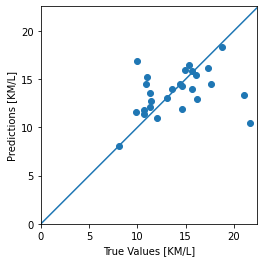

In [14]:
prediction = model.predict(x_test_std)
plt.scatter(Y_test,prediction)
plt.xlabel('True Values [KM/L]')
plt.ylabel('Predictions [KM/L]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [30]:
model.save(r'model.h5')

In [15]:
df.head()

,cylinders,displacement,horsepower,weight,model year,kml
0,4,1497,113.4,1191.0,22,12.04
1,4,1329,95.0,1045.0,22,14.60
2,4,1499,104.0,1780.0,20,11.80
3,3,998,97.0,1255.0,21,11.50
4,3,1618,257.0,1280.0,20,10.00


In [16]:
testing = [[6, 3346, 300.8, 2620, 22]]
testing = sc.transform(testing)
testing

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 1.94238094,  1.52276599,  5.37115304,  0.58567279, -1.49149031]])

In [17]:
prediction = model.predict(testing)
prediction

1/1 [==============================] - 0s 16ms/step


array([[24.929008]], dtype=float32)